To list COM clients, run the following command in PowerShell

```powershell
Get-ChildItem HKLM:\Software\Classes -ErrorAction SilentlyContinue | Where-Object {
$_.PSChildName -match '^\w+\.\w+$' -and (Test-Path -Path "$($_.PSPath)\CLSID")
} | Select-Object -ExpandProperty PSChildName 
```

In [1]:
import win32com.client
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import sigma_clipped_stats
from astropy.visualization import ImageNormalize, ZScaleInterval, MinMaxInterval, LinearStretch, LogStretch

## Use only one camera

In [38]:
# cam = win32com.client.Dispatch("ASCOM.Simulator.Camera")
cam = win32com.client.Dispatch("ASCOM.ASICamera2.Camera")

In [63]:
# Connect to the camera
cam.Connected = True

name = cam.Name
n_x, n_y = cam.CameraXSize, cam.CameraYSize
temp = cam.CCDTemperature
exp_min, exp_max = cam.ExposureMin, cam.ExposureMax
print(f"Camera name: {name}")
print(f"Camera resolution: {n_x} x {n_y} px")
print(f"CCD temperature: {temp} °C")
print(f"Exposure duration range: {exp_min} - {exp_max} s")

Camera name: ZWO ASI120MM Mini
Camera resolution: 1280 x 960 px
CCD temperature: 25.2 °C
Exposure duration range: 0.0 - 2000.0 s


In [64]:
# Choose the subframe position and size
cam.startX = 0
cam.startY = 0
cam.numX = n_x
cam.numY = n_y

In [65]:
# Take an exposure
exposure = 0.001 # seconds
cam.StartExposure(exposure, True)

In [66]:
# Retrieve the image
while cam.ImageReady == False:
    pass
image = cam.ImageArray

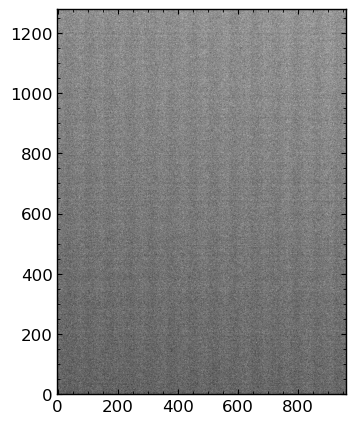

In [95]:
mean, med, sigma = sigma_clipped_stats(image, sigma=3.0)

fig, ax = plt.subplots()
norm = ImageNormalize(image, interval=ZScaleInterval(), stretch=LinearStretch())
ax.imshow(np.array(image), cmap='gray', origin='lower', norm=norm)
plt.show()

In [102]:
# Disconnect the camera
cam.Connected = False
cam.Dispose()

## Use two cameras

### Connection

Connect only one camera to the computer and running the following block.

In [147]:
cam1 = win32com.client.Dispatch("ASCOM.ASICamera2.Camera")
cam1.Connected = True
print(cam1.Name)

ZWO ASI120MM Mini


Then, connect the second camera to the computer and running the following block.

In [148]:
cam2 = win32com.client.Dispatch("ASCOM.ASICamera2.Camera")
cam2.Connected = True
print(cam2.Name)

ZWO ASI662MC


If both cameras show the same name, disconnect them and repeat the connection operation by connecting the cameras in the other order.

### Control both cameras

In [149]:
cam1.StartExposure(0.01, True)
cam2.StartExposure(0.01, True)

In [150]:
while cam1.ImageReady == False:
    pass
image1 = cam1.ImageArray

while cam2.ImageReady == False:
    pass
image2 = cam2.ImageArray

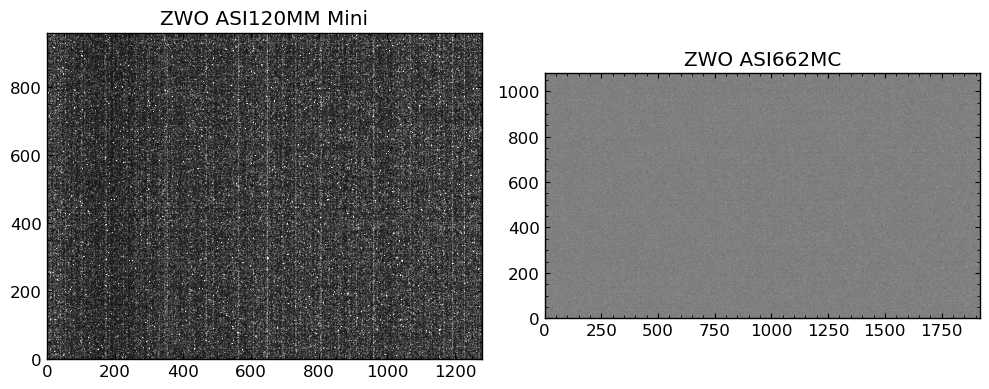

In [151]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

norm = ImageNormalize(image1, interval=ZScaleInterval(), stretch=LinearStretch())
axs[0].imshow(np.array(image1).T, cmap='gray', origin='lower', norm=norm)
axs[0].set_title(cam1.Name)

norm = ImageNormalize(image2, interval=ZScaleInterval(), stretch=LinearStretch())
axs[1].imshow(np.array(image2).T, cmap='gray', origin='lower', norm=norm)
axs[1].set_title(cam2.Name)

fig.tight_layout()
plt.show()

### Disconnect cameras

In [155]:
cam1.Connected = False
cam1.Dispose()

cam2.Connected = False
cam2.Dispose()